# Architecture de réseau neuronal convolutif

![moduleCNN.jpg](moduleCNN.jpg)

In [1]:
# chargement des tableaux de sauvegarde numpy dans le code précédent
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')


In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import layers

#créer le module 
model=Sequential()

#ajouter La première couche CNN suivie de fonction d'activation Relu et MaxPooling
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
#(nombre de sortie, taille de filter, nombre d'entrer , pas, padding(valid==>n'a pas de padding et same il existe de padding)
#fonction d'activation relu 
model.add(Activation('relu'))
#model.add(type de pooling(size de pooling pool_size=(2,2), strides=(2,2) pas de pooling))
model.add(MaxPooling2D(pool_size=(2,2)))

#ajouter La deuxième couche CNN suivie de fonction d'activation Relu et MaxPooling

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#flatten (applatissement) convertire les données extraite de l'image en un vecteur de taille NxN
model.add(Flatten())
#drpout l'aider et désactiver certans neurones d'une couche lors des étapes de l'apprentissage
model.add(Dropout(0.5))
#Flatten (Aplatisement) Aplatir la couche pour empiler les convolutions de sortie de la deuxième couche de convolution
model.add(Dense(50,activation='relu'))
#couche Dense de 50 neurones
model.add(Dense(2,activation='softmax'))
#La couche finale avec deux sorties pour deux catégories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#fonction d'erreur d'entropie croisée pour catégories 
print(model.summary())

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 200)       2000      
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 200)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
activation_2 (Activation)    (None, 47, 47, 100)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 52900)            

In [ ]:
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import layers

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(0.5))

model.add(Dense(50,activation='relu'))

model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary())

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 2438 samples, validate on 610 samples
Epoch 1/20
2438/2438 [==============================] - 73s 30ms/step - loss: 0.5923 - accuracy: 0.6637 - val_loss: 0.2833 - val_accuracy: 0.9164
Epoch 2/20
2438/2438 [==============================] - 73s 30ms/step - loss: 0.2563 - accuracy: 0.9073 - val_loss: 0.1979 - val_accuracy: 0.9377
Epoch 3/20
2438/2438 [==============================] - 73s 30ms/step - loss: 0.1535 - accuracy: 0.9479 - val_loss: 0.2046 - val_accuracy: 0.9115
Epoch 4/20
2438/2438 [==============================] - 72s 30ms/step - loss: 0.1062 - accuracy: 0.9590 - val_loss: 0.1129 - val_accuracy: 0.9590
Epoch 5/20
2438/2438 [==============================] - 72s 30ms/step - loss: 0.0996 - accuracy: 0.9651 - val_loss: 0.1026 - val_accuracy: 0.9672
Epoch 6/20
2438/2438 [==============================] - 72s 30ms/step - loss: 0.0905 - accuracy: 0.9647 - val_loss: 0.0949 - val_accuracy: 0.9607
Epoch 7/20
2438/2438 [==============================] - 72s 30ms/step - loss:

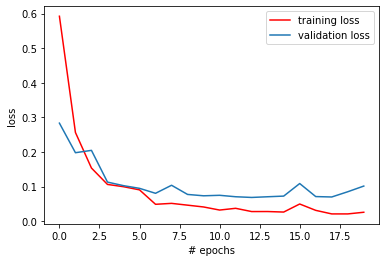

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

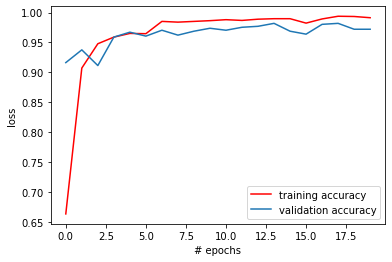

In [6]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
print(model.evaluate(test_data,test_target))

339/339 [==============================] - 3s 7ms/step
[0.060213602325194966, 0.9734513163566589]


In [8]:
model.save('masque.h5')